# Netflix_ Analysis_Project

##  Project Description – Netflix Data Analysis

- This project performs **Exploratory Data Analysis (EDA)** on the Netflix dataset containing **8,807 movies and TV shows**.
- The dataset includes attributes such as **title, type, director, cast, country, release year, rating, duration, genres, and date added**.
- Python libraries **Pandas, NumPy, Matplotlib, and Seaborn** were used for data cleaning, analysis, and visualization.
- The analysis begins with **loading the dataset** and examining its structure, data types, and overall shape.
- **Missing values** were identified and handled appropriately (e.g., filling country as *Unknown* and rating using the most frequent value).
- Date-related columns were converted into proper datetime format, and a new feature **`year_added`** was created to analyze trends over time.
- **Descriptive statistics** were generated to understand numeric distributions and categorical frequencies.
- The **genre column was split** to accurately analyze multi-genre content.
- Various visualizations were created to analyze:
  - Top genres available on Netflix  
  - Content distribution across release years  
  - Country-wise distribution of content  
  - Year-wise content added to Netflix  
  - Distribution of content ratings  
- Additional insights were obtained by identifying **top directors**, **longest-duration movies**, **genre trends over time**, and **correlations between numeric variables**.
- Overall, this project provides a clear understanding of Netflix’s **content diversity, growth patterns, and audience-focused strategy**.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step 1 — Load dataset

In [3]:
df = pd.read_csv(r"D:\Projects Datasets\netflix_titles.csv")
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


# Step 2 — Basic info and structure
## Check columns, types and basic shape of the data.

In [4]:
df.info()
print('\nShape:', df.shape)
print('\nColumns:', df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Shape: (8807, 12)

Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


# Step 3 — Missing values & duplicates

In [5]:
# Find missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing>0]

director      2634
country        831
cast           825
date_added      10
rating           4
duration         3
dtype: int64

In [6]:
# Remove duplicates
dup_count = df.duplicated().sum()
print('Duplicate rows:', dup_count)
if dup_count>0:
    df = df.drop_duplicates().reset_index(drop=True) 
    print('Duplicates removed. New shape:', df.shape)
else: 
    print('No duplicates to remove.')

Duplicate rows: 0
No duplicates to remove.


# Step 4 — Clean data
## Convert date columns and numeric values and fill simple missing values.

In [7]:
# Convert date_added to datetime
if 'date_added' in df.columns: 
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# Convert release_year to numeric
if 'release_year' in df.columns: 
    df['release_year'] = pd.to_numeric(df['release_year'],errors='coerce')
# Fill some common NAs with simple choices
if 'country' in df.columns: 
    df['country'] = df['country'].fillna('Unknown')
if 'rating' in df.columns: 
    df['rating'] = df['rating'].fillna(df['rating'].mode().iloc[0] if not df['rating'].mode().empty else 'NR')
    # Create year_added: prefer date_added year, fallback to release_year
    if 'date_added' in df.columns or 'release_year' in df.columns: 
        df['year_added'] = None 
        if 'date_added' in df.columns: 
            df['year_added'] = df['date_added'].dt.year
        if 'release_year' in df.columns: 
            df['year_added'] = df['year_added'].fillna(df['release_year']) 
        df['year_added'] = pd.to_numeric(df['year_added'], errors='coerce').astype('Int64')
        
        print('Cleaning done. Sample:')
        display(df[['date_added','release_year','year_added']].head())

Cleaning done. Sample:


,date_added,release_year,year_added
0,2021-09-25,2020,2021
1,2021-09-24,2021,2021
2,2021-09-24,2021,2021
3,2021-09-24,2021,2021
4,2021-09-24,2021,2021


# Step 5 — Descriptive statistics
## Show basic stats for numeric columns and value counts for categorical columns

In [8]:
# Numeric description
num_cols = df.select_dtypes(include=['int64','float64']).columns
if len(num_cols)>0:
    display(df[num_cols].describe())
else: 
    print('No numeric columns to describe.')

,release_year,year_added
count,8807.000000,8807.0
mean,2014.180198,2018.818894
std,8.819312,1.890668
min,1925.000000,1967.0
25%,2013.000000,2018.0
50%,2017.000000,2019.0
75%,2019.000000,2020.0
max,2021.000000,2021.0


In [9]:
# Categorical top values 
cat_cols = df.select_dtypes(include=['object']).columns
for c in cat_cols: 
    print('\nColumn:', c)
    print(df[c].value_counts().head(10))


Column: show_id
show_id
s1       1
s5875    1
s5869    1
s5870    1
s5871    1
s5872    1
s5873    1
s5874    1
s5876    1
s5850    1
Name: count, dtype: int64

Column: type
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Column: title
title
Dick Johnson Is Dead                1
Ip Man 2                            1
Hannibal Buress: Comedy Camisado    1
Turbo FAST                          1
Masha's Tales                       1
Chelsea Does                        1
Ricardo O'Farrill Abrazo Genial     1
Ip Man                              1
Tom Segura: Mostly Stories          1
Team Foxcatcher                     1
Name: count, dtype: int64

Column: director
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype

# Step 6 — Genre distribution
## Split listed_in into separate genres and count them

In [10]:
if 'listed_in' in df.columns: 
    df['listed_in'] = df['listed_in'].fillna('Unknown') 
    df['genre_list'] = df['listed_in'].astype(str).str.split(', ') 
    genre_series = df.explode('genre_list')['genre_list']
    top_genres = genre_series.value_counts().head(20) 
    print("Top Genres on Netflix:") 
    print(top_genres)
else: 
    print('No listed_in column in dataset.')

Top Genres on Netflix:
genre_list
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Music & Musicals             375
Romantic TV Shows            370
Horror Movies                357
Stand-Up Comedy              343
Reality TV                   255
Name: count, dtype: int64


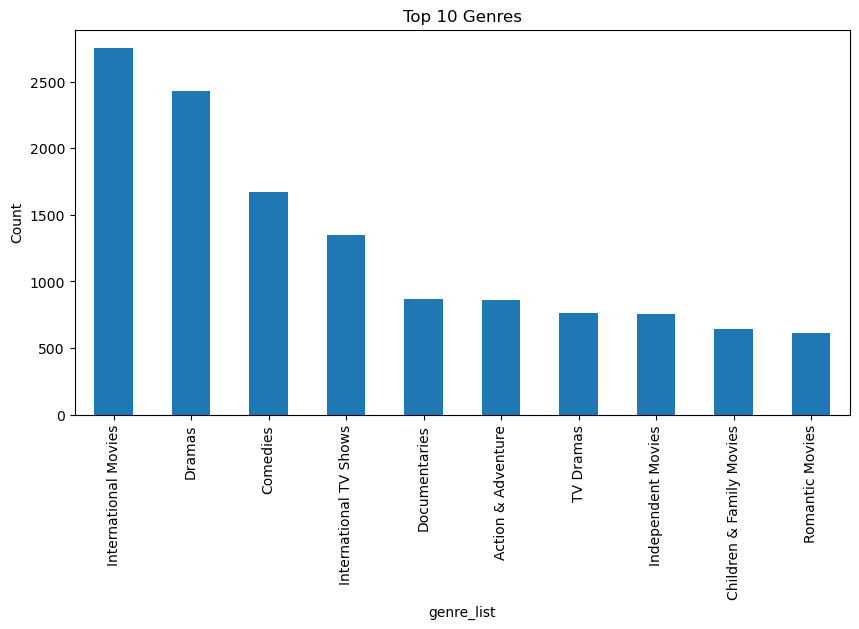

In [11]:
# Plot top 10 genres
if 'listed_in' in df.columns: 
    plt.figure(figsize=(10,5)) 
    genre_series.value_counts().head(10).plot(kind='bar') 
    plt.title('Top 10 Genres') 
    plt.ylabel('Count') 
    plt.show()
else: 
    print('No listed_in column.')

# Step 7 — Content distribution across release years
## Plot how many titles were released each year (based on release_year).

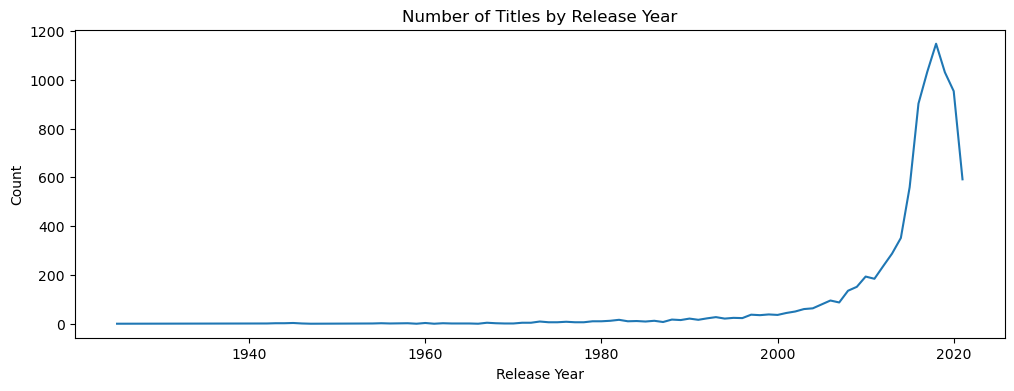

In [13]:
if 'release_year' in df.columns: 
    yearly = df['release_year'].value_counts().sort_index() 
    plt.figure(figsize=(12,4)) 
    yearly.plot() 
    plt.title('Number of Titles by Release Year') 
    plt.xlabel('Release Year') 
    plt.ylabel('Count') 
    plt.show()
else: 
    print('No release_year column.')

# Step 8 — Geographical distribution

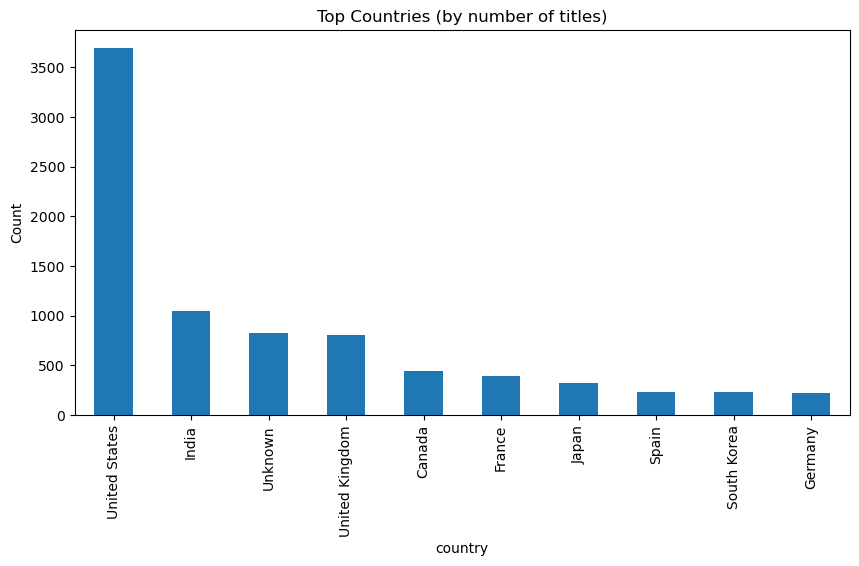

In [15]:
if 'country' in df.columns: 
    df['country'] = df['country'].fillna('Unknown') 
    country_series = df['country'].astype(str).str.split(', ').explode() 
    top_countries = country_series.value_counts().head(20) 
    top_countries 
    plt.figure(figsize=(10,5)) 
    top_countries.head(10).plot(kind='bar') 
    plt.title('Top Countries (by number of titles)') 
    plt.ylabel('Count') 
    plt.show()
else: 
    print('No country column.')

# Step 9 — Time series: content added over time
## If date_added exists, show how many titles were added by year

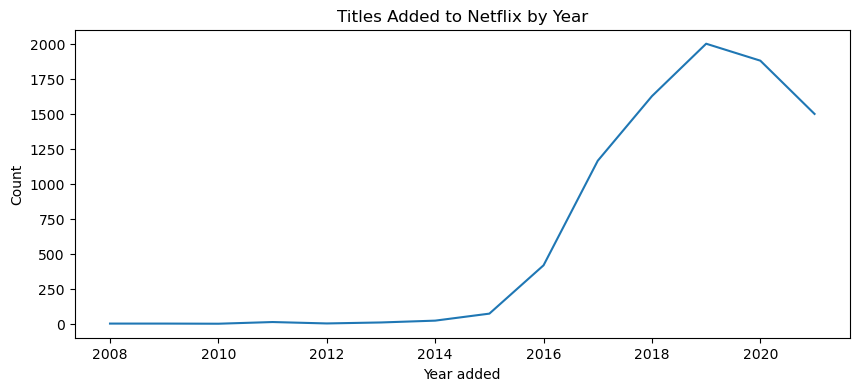

In [16]:
if 'date_added' in df.columns: 
    df['added_year'] = df['date_added'].dt.year 
    added_counts = df['added_year'].value_counts().sort_index() 
    plt.figure(figsize=(10,4)) 
    added_counts.plot() 
    plt.title('Titles Added to Netflix by Year') 
    plt.xlabel('Year added') 
    plt.ylabel('Count') 
    plt.show()
else: 
    print('No date_added column.')

# Step 10 — Content analysis
## Analyze distribution of content ratings.

In [17]:
if 'rating' in df.columns: 
    print('Rating value counts:') 
    display(df['rating'].value_counts().head(20))

Rating value counts:


rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

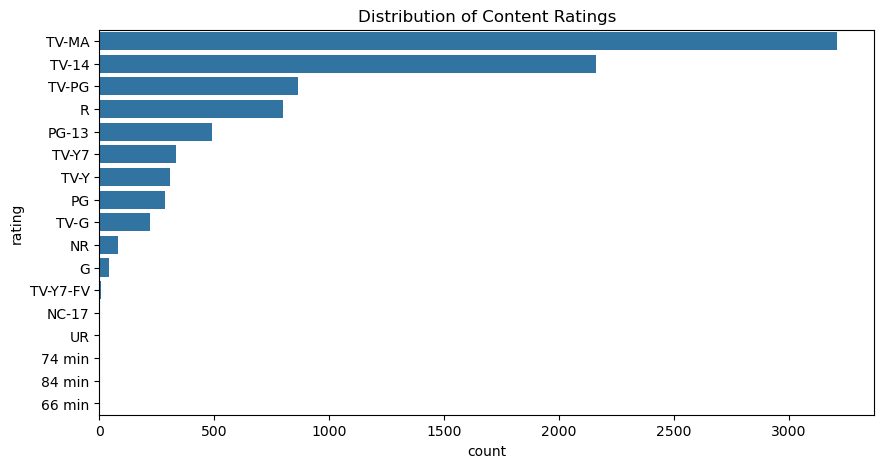

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.show()


# Step 11 — Top lists
## Show top popular titles by simple proxies: e.g., most frequent director, top genres, and top-rated titles.

In [26]:
if 'director' in df.columns: 
    print('Top directors:')
    display(df['director'].fillna('Unknown').value_counts().head(10))

if 'duration' in df.columns: 
    print('\nTop long movies (by minutes):') 
    display(df.sort_values('duration', ascending=False)
[['title','duration']].head(10))
else:
    print('No numeric rating or duration for top-by-score examples.')

Top directors:


director
Unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: count, dtype: int64


Top long movies (by minutes):


,title,duration
1329,The Misadventures of Hedi and Cokeman,99 min
6278,Being AP,99 min
952,The Whole Nine Yards,99 min
6141,American Hangman,99 min
929,Dead Again in Tombstone,99 min
5146,The Worthy,99 min
910,Monster,99 min
2780,Curtiz,99 min
894,Dance of the Forty One,99 min
7424,May We Chat,99 min


# Step 12 — Genre trends over time

In [27]:
if 'genre_list' in df.columns and 'year_added' in df.columns: 
    g = df.explode('genre_list').dropna(subset=['year_added']) 
    trend = g.groupby(['year_added','genre_list']).size().reset_index(name='count') 
    display(trend.sort_values(['year_added','count'], ascending=[True, False]).head(20))
else: 
    print('Genre or year_added missing — ensure previous steps ran.')

,year_added,genre_list,count
0,1967,Classic & Cult TV,1
1,1967,TV Comedies,1
2,1977,British TV Shows,1
3,1977,Classic & Cult TV,1
4,1977,TV Comedies,1
5,1988,TV Dramas,1
6,1990,Classic & Cult TV,1
7,1990,Kids' TV,1
8,1990,TV Comedies,1
9,1992,Classic & Cult TV,1


# Step 13 — Correlation analysis

In [28]:
num = df.select_dtypes(include=['int64','float64'])
if not num.empty: 
    display(num.corr())
else: 
    print('No numeric data to correlate.')

,release_year,year_added,added_year
release_year,1.000000,0.140038,0.110473
year_added,0.140038,1.000000,1.000000
added_year,0.110473,1.000000,1.000000


# Step 14 — Audience engagement (reviews/sentiment)

In [29]:
if 'reviews' in df.columns or 'review' in df.columns:
    print('There are review columns — inspect and analyze sentiment or counts.')
else: 
    print('No review column found. You can add external review data if available.')

No review column found. You can add external review data if available.


# Step 15 — Content variety
## Count unique genres and number of unique titles

In [30]:
print('Unique titles:', df['title'].nunique())
if 'genre_list' in df.columns: 
    print('Unique genres:', df.explode('genre_list')['genre_list'].nunique())
if 'language' in df.columns: 
    print('\nTop languages:') 
    display(df['language'].fillna('Unknown').value_counts().head(20))

Unique titles: 8807
Unique genres: 42


##  Final Conclusion

- Netflix has a **large and diverse content library**, with **Movies significantly outnumbering TV Shows**.
- **Drama, International Movies, Comedies, and Documentaries** are the most dominant genres on the platform.
- Netflix content comes from **multiple countries**, highlighting its **global reach**, with major contributions from the **United States and India**.
- A sharp **increase in content addition after 2015** reflects Netflix’s rapid expansion strategy.
- **TV-MA and TV-14** are the most common content ratings, indicating a strong focus on **mature and teenage audiences**.
- Genre trends show a preference for **story-driven, emotional, and globally diverse content**.
- Correlation analysis indicates **no strong linear relationship** between numeric variables, suggesting independent content characteristics.
- Overall, the analysis demonstrates Netflix’s emphasis on **content variety, global diversity, and continuous growth** to cater to a wide audience base.